<a href="https://colab.research.google.com/github/SDS-AAU/SDS-2020/blob/master/M3/workshop1/M3_W1_AirBnb_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M3 - Deep Learning Workshop 1

In this workshop will revisit the [AirBnb dataset](http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2020-06-26/data/listings.csv.gz) that we used in M1. 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#from sklearn.metrics import mean_squared_error


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline

In [4]:
from fancyimpute import IterativeImputer

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [5]:
listings = pd.read_csv('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2020-06-26/data/listings.csv.gz', compression='gzip')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (43,61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20200626200423,2020-06-28,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,Beautiful and cosy apartment conveniently loca...,Lovely apartment located in the hip Nørrebro a...,none,"Nice bars and cozy cafes just minutes away, ye...",NaN,Bus 66 runs to the central station. Forum metr...,"Bedroom, living room, kitchen, and bathroom fo...","We are usually at work during day time, but wi...",No smoking allowed! No pets.,NaN,NaN,https://a0.muscache.com/im/pictures/42044170/f...,NaN,16774,https://www.airbnb.com/users/show/16774,Simon,2009-05-12,"Copenhagen, Capital Region of Denmark, Denmark",I'm currently working as an environmental cons...,NaN,NaN,33%,f,https://a0.muscache.com/im/users/16774/profile...,https://a0.muscache.com/im/users/16774/profile...,Nørrebro,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Copenhagen, Hovedstaden, Denmark",Nørrebro,Nrrebro,...,$66.00,2,15,2,2,15,15,2.0,15.0,5 months ago,t,29,59,89,89,2020-06-28,168,1,2009-09-04,2019-07-19,96.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,0,1,0,1.28
1,26057,https://www.airbnb.com/rooms/26057,20200626200423,2020-06-28,Lovely house - most attractive area,Our lovely house in the center of the city is ...,Totally charming old 150 m2 stone house from y...,Our lovely house in the center of the city is ...,none,The neighborhood is the most famous one and th...,NaN,Walking-distance to metro/station for transpor...,You will have access to the whole house,NaN,We will leave the house clean and in good and ...,NaN,NaN,https://a0.muscache.com/im/pictures/bfbca07e-4...,NaN,109777,https://www.airbnb.com/users/show/109777,Kari,2010-04-17,"Copenhagen, Capital Region of Denmark, Denmark","We are a family with 2 children, and living in...",NaN,NaN,19%,f,https://a0.muscache.com/im/users/109777/profil...,https://a0.muscache.com/im/users/109777/profil...,Indre By,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Copenhagen, Hovedstaden, Denmark",Indre By,Indre By,...,$350.00,3,30,3,3,30,30,3.0,30.0,4 months ago,t,28,58,88,363,2020-06-28,50,4,2013-12-02,2019-12-14,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,0.62
2,26473,https://www.airbnb.com/rooms/26473,20200626200423,2020-06-28,City Centre Townhouse Sleeps 1-12 persons,TOWN HOUSE ON KNABROSTRÆDE - located in the ab...,The house is a total of 240sqm divided on 4 fl...,TOWN HOUSE ON KNABROSTRÆDE - located in the ab...,none,NaN,NaN,NaN,NaN,NaN,Please be respectful to the neighbors and keep...,NaN,NaN,https://a0.mus

In [7]:
listings.price = listings.price.str.replace(',','')
listings.price = listings.price.str.replace('$','')
listings.price = listings.price.astype(float)

In [8]:
listings.cleaning_fee = listings.cleaning_fee.str.replace(',','')
listings.cleaning_fee = listings.cleaning_fee.str.replace('$','')
listings.cleaning_fee = listings.cleaning_fee.astype(float)

In [9]:
listings['price_total'] = listings.price + listings.cleaning_fee

In [10]:
listings_clean = listings[listings.price_total < listings.price_total.quantile(0.95)]

In [11]:
listings_clean = listings_clean[listings.number_of_reviews > 5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [13]:
listings_clean = listings_clean[listings_clean.property_type.isin(['Apartment','Condominium','House'])]
listings_clean = listings_clean[listings_clean.bed_type.isin(['Real Bed','Pull-out Sofa'])]

In [14]:
y = listings_clean.price_total

In [15]:
X = listings_clean.iloc[:,[39,51,52,53,54,55,56,57]]

In [18]:
X = pd.get_dummies(X)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X.iloc[:,:4] = scaler.fit_transform(X.iloc[:,:4])

In [ ]:
X.iloc[:,:4] = IterativeImputer().fit_transform(X.iloc[:,:4])

In [23]:
X.isnull().sum()

accommodates                                        0
bathrooms                                           0
bedrooms                                            0
beds                                                0
neighbourhood_cleansed_Amager Vest                  0
neighbourhood_cleansed_Amager st                    0
neighbourhood_cleansed_Bispebjerg                   0
neighbourhood_cleansed_Brnshj-Husum                 0
neighbourhood_cleansed_Frederiksberg                0
neighbourhood_cleansed_Indre By                     0
neighbourhood_cleansed_Nrrebro                      0
neighbourhood_cleansed_Valby                        0
neighbourhood_cleansed_Vanlse                       0
neighbourhood_cleansed_Vesterbro-Kongens Enghave    0
neighbourhood_cleansed_sterbro                      0
property_type_Apartment                             0
property_type_Condominium                           0
property_type_House                                 0
room_type_Entire home/apt   

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model_ols = LinearRegression()
model_ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model_ols.score(X_test, y_test)

0.5136379636229365

In [36]:
np.sqrt(mean_squared_error(y_test, model_ols.predict(X_test)))

309.4208279339082

In [31]:
X_train.shape

(8058, 23)

In [38]:
model = Sequential()
model.add(Dense(10,activation='relu',input_shape = (23,)))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(optimizer = 'adam', loss='mean_squared_error',
             metrics=mean_squared_error)

In [ ]:
history = model.fit(X_train, 
                    y_train,
                    epochs = 200,
                    batch_size = 32,
                    verbose=2, validation_split=0.1)

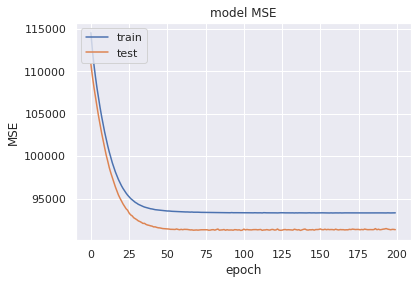

In [45]:
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 728us/step - loss: 95775.0234 - mean_squared_error: 95775.0234


[95775.0234375, 95775.0234375]

In [47]:
np.sqrt(95775.0234)

309.47540031479076